In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from opendp.mod import binary_search, binary_search_param, enable_features

from tools import *

enable_features('contrib')
enable_features('floating-point')

In [ ]:
def compute_error(X, Y, lamb, beta):
    n = len(Y)
    error = 0.
    for i in range(n):
        term = np.dot(X[i],beta) - Y[i]
        error += term*term
    loss = error / (2 * n)
    norm = beta.dot(beta)
    return (loss + lamb * norm) / 2 

# def ridge_regression(X,Y, epsilon, delta = 10. ** (-5), lamb = 1. ** (-5)):
#     d = 3
#     [n,d] = X.shape

#     R = X.T.dot(Y)
#     sigma = (X.T).dot(X) + lamb * np.eye(d)
#     return np.linalg.inv(sigma).dot(R)

def squared_loss(theta, x, y):
    n = len(x)
    return (1 / n) * np.sum((theta * x - y) ** 2)

def d_squared_loss(theta, x, y):
    n = len(x)
    return (2 / n) * np.sum((theta * x - y) * x)

def dp_ridge(X, Y, epsilon, delta = 10. ** (-5), T=100, bounds=(-1., 1.), C_1=1., L_1=1., dim=1):
    assert(len(X) == len(Y))
    n = len(X)

    if dim != 1:
        print("Data is not 1D")
        return 

    lamb = np.random.choice(bounds)
    beta = np.random.choice((-0.5, 0.5))
    s1, s2 = bounds

    noise_scale = (L_1 * C_1 * np.sqrt(8 * T * np.log(1./delta))) / (n * epsilon)

    for t in range(T):
        # as we are in the 1D case, there are only two points in the hull to consider: the bounds
        loss_1 = s1 * compute_error(X, Y, lamb, beta) + laplace(scale=noise_scale)
        loss_2 = s2 * compute_error(X, Y, lamb, beta) + laplace(scale=noise_scale)
        choice = s1
        if loss_2 < loss_1:
            choice = s2
        mu_t = 2 / (t+2)
        theta = (1-mu_t)*theta + mu_t*choice
    return theta
        


In [ ]:
epsilon, delta = 1., 10. ** (-5)
trials = 1000

true_sd, true_bias, dp_sd, dp_bias = [], [], [], []

for n in range(100, 5001, 100):
    slope = 1.
    true_ols, dp_ols = [], []
    for _ in range(trials):
        x = np.random.uniform(-0.5, 0.5, n)
        y = clamp(slope * x + np.random.normal(loc=0., scale=0.02, size=n), (-1, 1))
        true_ols.append(ridge_regression(x, y, 1))
        dp_ols.append(dp_ridge(x, y, epsilon, delta))
    true_sd.append(np.std(true_ols))
    true_bias.append(np.mean(true_ols) - 1.)
    dp_sd.append(np.std(dp_ols))
    dp_bias.append(np.mean(dp_ols) - 1.)

ValueError: not enough values to unpack (expected 2, got 1)

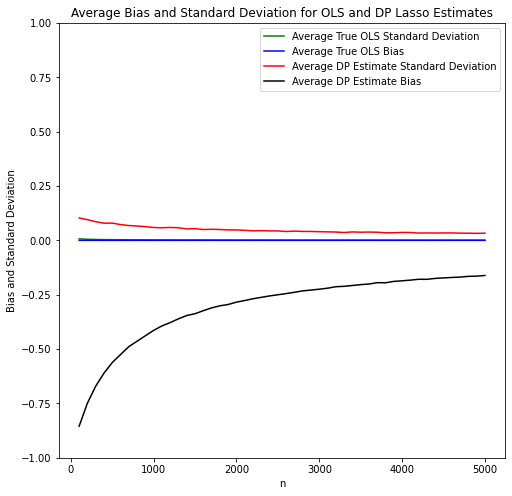

In [ ]:
plot_true_sd = clamp(true_sd, (-1, 1))
plot_true_bias = clamp(true_bias, (-1, 1))
plot_dp_sd = clamp(dp_sd, (-1, 1))
plot_dp_bias = clamp(dp_bias, (-1, 1))

plt.figure(figsize=(8, 8))

plt.plot(list(range(100, 5001, 100)), plot_true_sd, color="green", label="Average True OLS Standard Deviation")
plt.plot(list(range(100, 5001, 100)), plot_true_bias, color="blue", label="Average True OLS Bias")
plt.plot(list(range(100, 5001, 100)), plot_dp_sd, color="red", label="Average DP Estimate Standard Deviation")
plt.plot(list(range(100, 5001, 100)), plot_dp_bias, color="black", label="Average DP Estimate Bias")

plt.xlabel("n")
plt.ylim(-1, 1)
plt.ylabel("Bias and Standard Deviation")
plt.title("Average Bias and Standard Deviation for OLS and DP Lasso Estimates")
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5d71c9c3-da98-48cf-bf84-cbaf5507821e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>